In [ ]:
from numpy import pi
import numpy as np 
import matplotlib.pyplot as plt

def euler(m,k,h,t,init_x,init_v,sampling):
    x=init_x
    v=init_v
    xlist=[]
    vlist=[]
    time_unit=np.sqrt(m/k)
    reduced_t=t/(time_unit)
    f=lambda x:-x
    N=int(reduced_t/h)
    for i in range(N):
        x_temp=x 
        x=x+h*v
        v=v+h*f(x_temp)
        if i%sampling==0:
            xlist.append(x)
            vlist.append(v)
    return xlist,vlist

def euler_cromer(m,k,h,t,init_x,init_v,sampling):
    x=init_x
    v=init_v
    xlist=[]
    vlist=[]
    time_unit=np.sqrt(m/k)
    reduced_t=t/(time_unit)
    f=lambda x:-x
    N=int(reduced_t/h)
    for i in range(N):
        v=v+h*f(x)
        x=x+h*v
        if i%sampling==0:
            xlist.append(x)
            vlist.append(v)
    return xlist,vlist

def verlet (m,k,h,t,init_x,init_v,sampling):
    xlist=[]
    vlist=[]
    time_unit=np.sqrt(m/k)
    reduced_t=t/(time_unit)
    f=lambda x:-x
    N=int(reduced_t/h)

    x_temp=[]
    x=init_x+h*init_v
    v=init_v+h*f(init_x)
    x_temp.extend([init_x,x])
    for i in range(N):
        x=-x_temp[0]+2*x_temp[1]+f(x_temp[1])*(h**2)
        v=(x-x_temp[0])/(2*h)
        x_temp[0]=x_temp[1]
        x_temp[1]=x
        if i%sampling==0:
            xlist.append(x)
            vlist.append(v)
    
    return xlist,vlist


def velocity_verlet(m,k,h,t,init_x,init_v,sampling):
    xlist=[]
    vlist=[]
    time_unit=np.sqrt(m/k)
    reduced_t=t/(time_unit)
    f=lambda x:-x
    N=int(reduced_t/h)


    x=init_x
    v=init_v
    for i in range(N):
        x_temp=x
        x=x+v*h+(1/2)*f(x)*(h**2)
        v=v+(1/2)*(f(x)+f(x_temp))*h 
        if i%sampling==0:
            xlist.append(x)
            vlist.append(v)
    
    return xlist,vlist

def beeman(m,k,h,t,init_x,init_v,sampling):
    xlist=[]
    vlist=[]
    time_unit=np.sqrt(m/k)
    reduced_t=t/(time_unit)
    f=lambda x:-x
    N=int(reduced_t/h)

    x_temp=[]
    x=init_x+h*init_v
    v=init_v+h*f(init_x)
    x_temp.extend([init_x,x])
    for i in range(N):
        x=x_temp[1]+v*h+(1/6)*(4*f(x_temp[1])-f(x_temp[0]))*(h**2)
        v=v+(1/6)*(2*f(x)+5*f(x_temp[1])-f(x_temp[0]))*h
        x_temp[0]=x_temp[1]
        x_temp[1]=x
        if i%sampling==0:
            xlist.append(x)
            vlist.append(v)
    
    return xlist,vlist

m=10
k=10
h=10**(-4)
time_unit=np.sqrt(m/k)
t=1000*2*pi*time_unit #simulation time
sampling_time=1000
x0=0
v0=1
x1,v1=euler(m,k,h,t,x0,v0,sampling_time)
x2,v2=euler_cromer(m,k,h,t,x0,v0,sampling_time)
x3,v3=verlet(m,k,h,t,x0,v0,sampling_time)
x4,v4=velocity_verlet(m,k,h,t,x0,v0,sampling_time)
x5,v5=beeman(m,k,h,t,x0,v0,sampling_time)


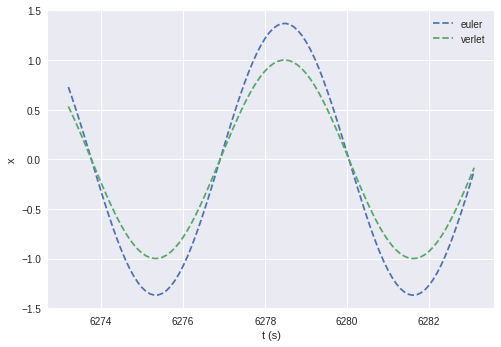

In [ ]:
plt.style.use('seaborn')
plt.plot(np.arange(len(x1))[-100:]*time_unit*sampling_time*h,x1[-100:],'--',label='euler')
#plt.plot(np.arange(len(x2))[-100:]*time_unit*sampling_time*h,x2[-100:],'--',label='euler_cromer')
plt.plot(np.arange(len(x3))[-100:]*time_unit*sampling_time*h,x3[-100:],'--',label='verlet')
#plt.plot(np.arange(len(x4))[-100:]*time_unit*sampling_time*h,x4[-100:],'--',label='velocity_verlet')
#plt.plot(np.arange(len(x5))[-100:]*time_unit*sampling_time*h,x5[-100:],'--',label='beeman')
plt.xlabel('t (s)')
plt.ylabel('x')
plt.legend()
plt.show()

In [1]:
%load_ext cython 

In [2]:
from google.colab import drive 
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
%cd /content/drive/My\ Drive/Colab\ Notebooks/CompPhys/HW-8/Pics

/content/drive/My Drive/Colab Notebooks/CompPhys/HW-8/Pics


In [4]:
%%cython 
from libc.math cimport sqrt,pi 
import numpy as np 
cimport numpy as np
import matplotlib.pyplot as plt

cdef float f(float x):
  return -x

cdef euler(float m,float k,float h,float t,float init_x,float init_v,int sampling,float (*f)(float)):
    cdef float x=init_x
    cdef float v=init_v
    cdef float time_unit=sqrt(m/k)
    cdef float reduced_t=t/(time_unit)
    cdef int N=int(reduced_t/h)
    cdef np.ndarray[np.float64_t, ndim=1] xlist=np.zeros(int(N/sampling)+1)
    cdef np.ndarray[np.float64_t, ndim=1] vlist=np.zeros(int(N/sampling)+1)
    
    cdef int i 
    cdef int count=0
    for i in range(N):
        x_temp=x 
        x=x+h*v
        v=v+h*f(x_temp)
        if i%sampling==0:
            xlist[count]=x
            vlist[count]=v
            count+=1
    return xlist,vlist

cdef euler_cromer(float m,float k,float h,float t,float init_x,float init_v,int sampling,float (*f)(float)):
    cdef float x=init_x
    cdef float v=init_v
    cdef float time_unit=sqrt(m/k)
    cdef float reduced_t=t/(time_unit)
    cdef int N=int(reduced_t/h)
    cdef np.ndarray[np.float64_t, ndim=1] xlist=np.zeros(int(N/sampling)+1)
    cdef np.ndarray[np.float64_t, ndim=1] vlist=np.zeros(int(N/sampling)+1)
    
    cdef int i 
    cdef counter=0
    for i in range(N):
        v=v+h*f(x)
        x=x+h*v
        if i%sampling==0:
            xlist[counter]=(x)
            vlist[counter]=v 
            counter+=1
    return xlist,vlist

cdef verlet (float m,float k,double h,t,double init_x,double init_v,int sampling,float (*f)(float)):
    cdef float time_unit=sqrt(m/k)
    cdef float reduced_t=t/(time_unit)
    cdef int N=int(reduced_t/h)
    cdef np.ndarray[np.float64_t, ndim=1] xlist=np.zeros(int(N/sampling)+1)
    cdef np.ndarray[np.float64_t, ndim=1] vlist=np.zeros(int(N/sampling)+1)
    cdef np.ndarray[np.float64_t, ndim=1] x_temp =np.zeros(2)
    cdef double x=init_x+h*init_v
    cdef double v=init_v+h*f(init_x)
   
    x_temp[0]=init_x
    x_temp[1]=x
    cdef int counter=0  
    cdef int i 
    for i in range(N):
        x=-x_temp[0]+2*x_temp[1]+f(x_temp[1])*(h**2)
        v=(x-x_temp[0])/(2*h)
        x_temp[0]=x_temp[1]
        x_temp[1]=x
        if i%sampling==0:
            xlist[counter]=x
            vlist[counter]=v
            counter+=1
    
    return xlist,vlist


cdef velocity_verlet(float m,float k,double h,float t,double init_x,double init_v,int sampling,float (*f)(float)):
    cdef float time_unit=sqrt(m/k)
    cdef float reduced_t=t/(time_unit)
    cdef int N=int(reduced_t/h)
    cdef np.ndarray[np.float64_t, ndim=1] xlist=np.zeros(int(N/sampling)+1)
    cdef np.ndarray[np.float64_t, ndim=1] vlist=np.zeros(int(N/sampling)+1)
    
    cdef double x=init_x
    cdef double v=init_v
    cdef int i 
    cdef int counter=0
    for i in range(N):
        x_temp=x
        x=x+v*h+(1/2)*f(x)*(h**2)
        v=v+(1/2)*(f(x)+f(x_temp))*h 
        if i%sampling==0:
            xlist[counter]=x
            vlist[counter]=v
            counter+=1
    
    return xlist,vlist

cdef beeman(float m,float k,float h,float t,float init_x,float init_v,int sampling,float (*f)(float)):
    cdef float time_unit=sqrt(m/k)
    cdef float reduced_t=t/(time_unit)
    cdef int N=int(reduced_t/h)
    cdef np.ndarray[np.float64_t, ndim=1] xlist=np.zeros(int(N/sampling)+1)
    cdef np.ndarray[np.float64_t, ndim=1] vlist=np.zeros(int(N/sampling)+1)
    cdef np.ndarray[np.float64_t, ndim=1] x_temp=np.zeros(2)
  
    cdef float x=init_x+h*init_v
    cdef float v=init_v+h*f(init_x)
    x_temp[0]=init_x
    x_temp[1]=x
    cdef int i 
    cdef int counter=0 
    for i in range(N):
        x=x_temp[1]+v*h+(1/6)*(4*f(x_temp[1])-f(x_temp[0]))*(h**2)
        v=v+(1/6)*(2*f(x)+5*f(x_temp[1])-f(x_temp[0]))*h
        x_temp[0]=x_temp[1]
        x_temp[1]=x
        if i%sampling==0:
            xlist[counter]=x
            vlist[counter]=v
            counter+=1
    
    return xlist,vlist

cdef float m=10
cdef float k=10
cdef double h=10.0**(-4)
cdef float time_unit=sqrt(m/k)
cdef float t=1000*2*pi*time_unit #simulation time
cdef int sampling_time=1000
cdef double x0=0
cdef double v0=1

x1,v1=euler(m,k,h,t,x0,v0,sampling_time,f)
x2,v2=euler_cromer(m,k,h,t,x0,v0,sampling_time,f)
x3,v3=verlet(m,k,h,t,x0,v0,sampling_time,f)
x4,v4=velocity_verlet(m,k,h,t,x0,v0,sampling_time,f)
x5,v5=beeman(m,k,h,t,x0,v0,sampling_time,f)


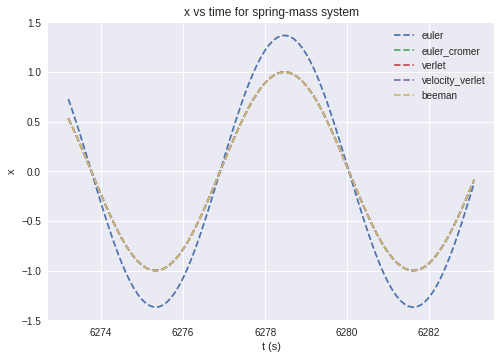

In [11]:
from numpy import sqrt,pi 
m=10
k=10
h=10.0**(-4)
time_unit=sqrt(m/k)
t=1000*2*pi*time_unit #simulation time
sampling_time=1000
x0=0
v0=1

plt.style.use('seaborn')
plt.plot(np.arange(len(x1))[-100:]*time_unit*sampling_time*h,x1[-100:],'--',label='euler')
plt.plot(np.arange(len(x2))[-100:]*time_unit*sampling_time*h,x2[-100:],'--',label='euler_cromer')
plt.plot(np.arange(len(x3))[-100:]*time_unit*sampling_time*h,x3[-100:],'--',label='verlet')
plt.plot(np.arange(len(x4))[-100:]*time_unit*sampling_time*h,x4[-100:],'--',label='velocity_verlet')
plt.plot(np.arange(len(x5))[-100:]*time_unit*sampling_time*h,x5[-100:],'--',label='beeman')
plt.xlabel('t (s)')
plt.ylabel('x')
plt.legend()
plt.title('x vs time for spring-mass system')
plt.savefig('late spring-mass.png',bbox_inches='tight')
plt.show()

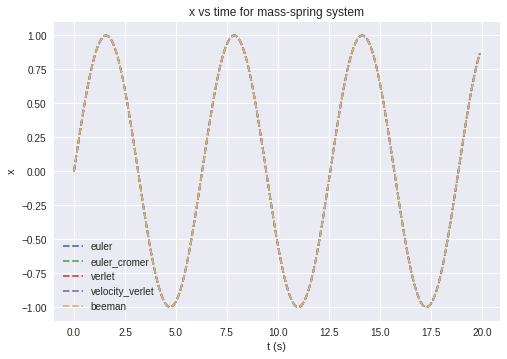

In [12]:
from numpy import sqrt,pi 
m=10
k=10
h=10.0**(-4)
time_unit=sqrt(m/k)
t=1000*2*pi*time_unit #simulation time
sampling_time=1000
x0=0
v0=1

plt.style.use('seaborn')
plt.plot(np.arange(len(x1))[:200]*time_unit*sampling_time*h,x1[:200],'--',label='euler')
plt.plot(np.arange(len(x2))[:200]*time_unit*sampling_time*h,x2[:200],'--',label='euler_cromer')
plt.plot(np.arange(len(x3))[:200]*time_unit*sampling_time*h,x3[:200],'--',label='verlet')
plt.plot(np.arange(len(x4))[:200]*time_unit*sampling_time*h,x4[:200],'--',label='velocity_verlet')
plt.plot(np.arange(len(x5))[:200]*time_unit*sampling_time*h,x5[:200],'--',label='beeman')
plt.xlabel('t (s)')
plt.ylabel('x')
plt.legend()
plt.title('x vs time for mass-spring system')
plt.savefig('early spring-mass.png',bbox_inches='tight')
plt.show()

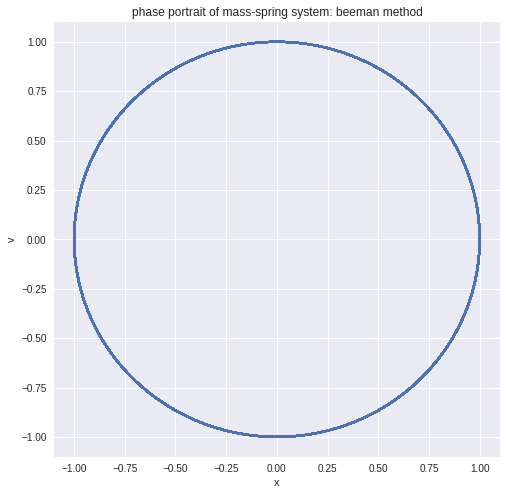

In [17]:
fig=plt.figure(figsize=(8,8))
plt.plot(x5,v5)
plt.xlabel('x')
plt.ylabel('v')
plt.title('phase portrait of mass-spring system: beeman method')
plt.savefig('beeman.png',bbox_inces='tight')